<a href="https://colab.research.google.com/github/fahadrajput99/deep-learning/blob/main/brain_tumor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

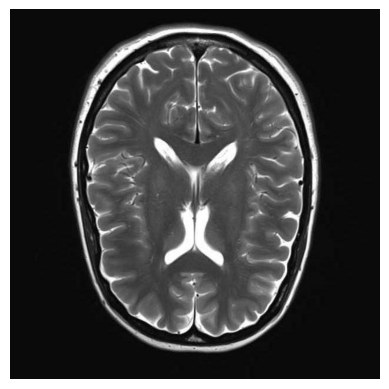

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('/content/drive/MyDrive/chest ultrasound dataset/archive_5/brain_tumor_dataset/no/No12.jpg')

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
import os

# List all files and folders in a directory
path = '/content/drive/MyDrive/chest ultrasound dataset/archive_5/brain_tumor_dataset'
files = os.listdir(path)

In [3]:
print(files)

['yes', 'no']


In [7]:
import tensorflow as tf

# Define constants
IMAGE_SIZE = 224  # or any other size you're using
batch_size = 32   # set batch size

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/chest ultrasound dataset/archive_5/brain_tumor_dataset",  # Path to the dataset directory
    shuffle=True,      # Shuffle the data
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resize the images
    batch_size=batch_size                # Set batch size
)

# Check the first batch
for images, labels in dataset.take(1):
    print(images.shape)  # e.g., (32, 224, 224, 3)
    print(labels)        # Corresponding labels


Found 3032 files belonging to 2 classes.
(32, 224, 224, 3)
tf.Tensor([1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)


In [ ]:
class_name=dataset.class_names
print(class_name)

['no', 'yes']


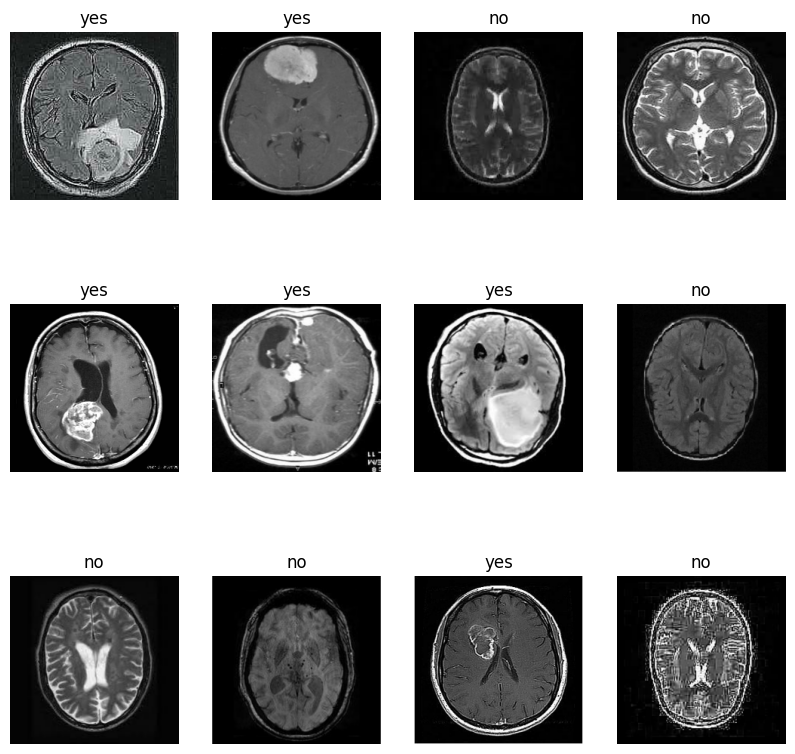

In [ ]:
plt.figure(figsize = (10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3 , 4 , i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(val_ds)

9

In [ ]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [ ]:
resizing_rescaling = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])

In [ ]:
data_augmentaion = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)

])

In [ ]:
batch_size=32
channel=3
IMAGE_SIZE=256

In [ ]:
input_shape=(batch_size ,IMAGE_SIZE , IMAGE_SIZE , channel)
n_classes = 2

model= models.Sequential([
    resizing_rescaling,
    data_augmentaion,
    layers.Conv2D(32 , (3,3) , activation = "relu" , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,(3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128 , (3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128 ,(3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,(3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,(3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 , activation="relu"),
    layers.Dense(n_classes , activation = "softmax"),
])

model.build(input_shape = input_shape)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 10, 10, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 3, 3, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,842 (1.36 MB)

 Trainable params: 355,842 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"])

In [ ]:
history = model.fit(
    train_ds,
    epochs=20,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds)


Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 551s 197ms/step - accuracy: 0.5898 - loss: 0.6658 - val_accuracy: 0.7292 - val_loss: 0.5426
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 39s 189ms/step - accuracy: 0.7883 - loss: 0.4705 - val_accuracy: 0.7917 - val_loss: 0.4371
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.8040 - loss: 0.4289 - val_accuracy: 0.7812 - val_loss: 0.4604
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - accuracy: 0.7735 - loss: 0.4917 - val_accuracy: 0.8536 - val_loss: 0.3250
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.8286 - loss: 0.3947 - val_accuracy: 0.8286 - val_loss: 0.3725
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 25s 191ms/step - accuracy: 0.8215 - loss: 0.3976 - val_accuracy: 0.8438 - val_loss: 0.3703
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 187ms/step - accuracy: 0.8711 - loss: 0.3255 - val_accuracy: 0.8924 - val_loss: 0.2733
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.8750 - loss: 0.2954 - val_acc

In [ ]:
import numpy as np
score=model.predict(test_ds)
predicted_labels = np.argmax(score, axis=1)
predicted_labels

10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step


array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

first image to predict
actual_label: no
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
predicted_label: no


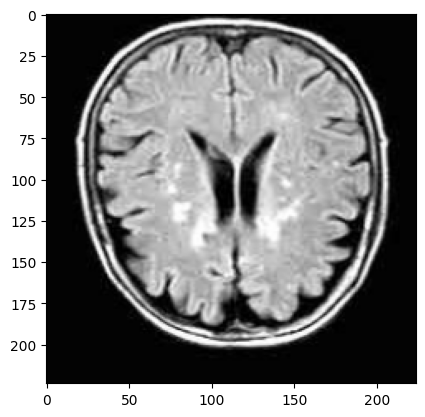

In [ ]:
import numpy as np
for image_batch , label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype ("uint8")
    first_label=label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual_label:" , class_name[first_label])

    batch_prediction=model.predict(image_batch)
    print("predicted_label:" , class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model , img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array , 0)

    prediction=model.predict(img_array)

    prediction_class=class_name[np.argmax(batch_prediction[0])]
    confidence=round(100*(np.max(prediction[0])) , 2)
    return prediction_class , confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


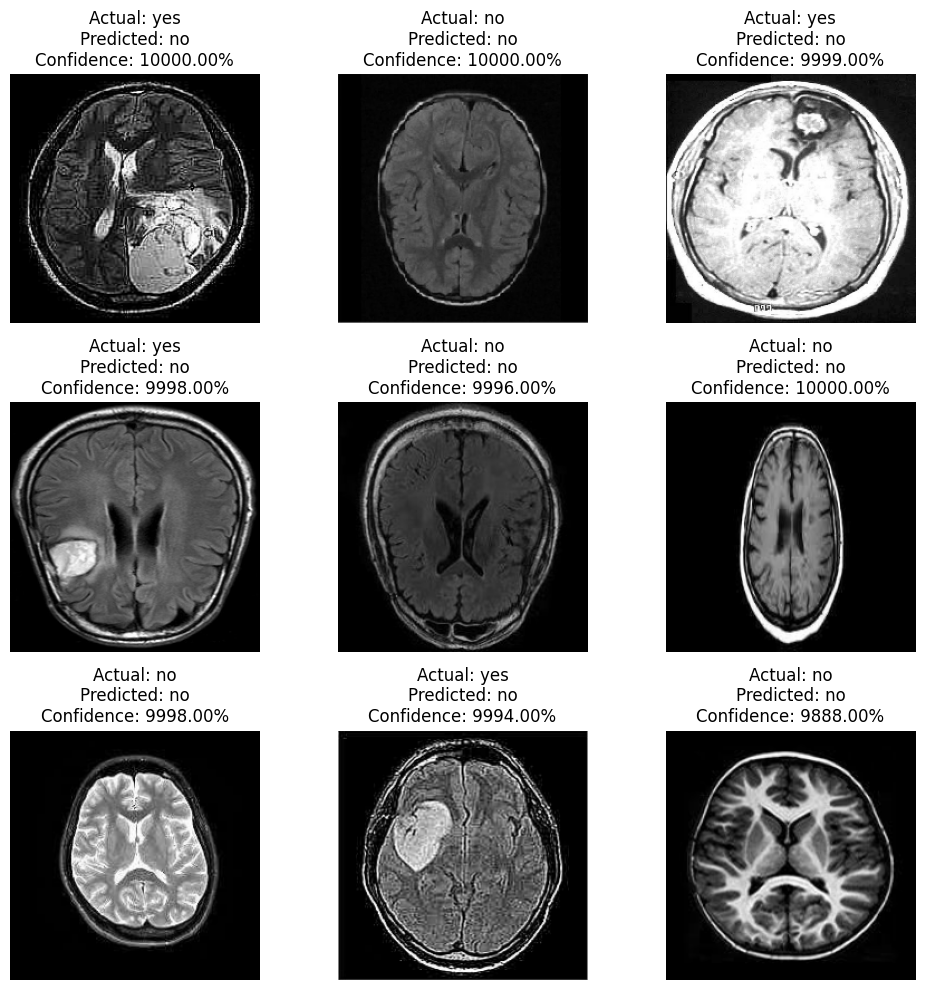

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Taking one batch from the test dataset
for images, labels in test_ds.take(1):
    # Iterating through the first 9 images in the batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots

        # Display the image
        plt.imshow(images[i].numpy().astype("uint8"))

        # Predict the class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())

        # Convert actual label tensor to an integer, then get the class name
        actual_class = class_name[int(labels[i].numpy())]

        # Set the title of each subplot
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence * 100:.2f}%")
        plt.axis("off")  # Turn off the axis

plt.tight_layout()  # Adjust layout for better display
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_ds, y_pred_classes)
print(cm)


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step


ValueError: Found input variables with inconsistent numbers of samples: [10, 320]